In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Volume

In [2]:
df1 = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/Computational-chemistry-course-project/volume/results_23-07-2023_12-36.csv', sep = ',')
df2 = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/Computational-chemistry-course-project/volume/results_24-07-2023_16-39.csv', sep = ',')
df3 = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/Computational-chemistry-course-project/volume/results_24-07-2023_21-18.csv', sep = ',')
df3_different_basis = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/Computational-chemistry-course-project/volume/results_22-07-2023_14-49.csv', sep = ',')

df_accum = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/work with NATURE dataset - neutral molecules/Gram Negative Permeation - OmpF- applying for Nature_data_neutral_charge/mixed_data(to_work)_for docking_neutral_charges.csv', sep = ',')

df12 = pd.concat([df1, df2], ignore_index=True)
final_vol = pd.concat([df12, df3], ignore_index=True)

In [6]:
new_col = []
short_names = []
for name in final_vol['refcode'].tolist():
    #print(name)
    x = name.split("_", 1)[0]
    short_names.append(x)
    acc_value = df_accum[df_accum['name'] == x]['Permeability coefficient'].tolist()[0]
    #print(acc_value)
    new_col.append(acc_value)
    
final_vol['Permeability coefficient']  = new_col 
final_vol['Name']  = short_names
final_vol['DFT functional'] = 'M06-2X'
final_vol = final_vol.sort_values(['Permeability coefficient'], ascending = False)
final_vol

,refcode,mean,STD,min,max,median,Permeability coefficient,Name,DFT functional
6,2-1_9304_vol,241.6934,23.463255,208.307,282.499,233.9890,1965.0,2-1,M06-2X
2,4-9_8971_vol,260.1535,29.036711,214.730,319.342,264.2830,922.0,4-9,M06-2X
7,4-28a_8960_vol,279.4684,20.040541,255.913,325.707,277.7235,894.6,4-28a,M06-2X
11,2-6_8849_vol,242.8587,20.679352,215.191,274.113,243.3710,504.0,2-6,M06-2X
1,2-18_8986_vol,279.3422,29.520616,228.813,327.329,276.4820,390.0,2-18,M06-2X
9,4-33_9018_vol,255.2772,14.218990,225.702,272.399,260.7250,335.0,4-33,M06-2X
10,4-36_9022_vol,239.4845,26.369223,182.851,286.975,242.5320,275.0,4-36,M06-2X
4,3-54_11009_vol,207.4215,20.166065,174.286,251.746,206.5605,238.0,3-54,M06-2X
8,4-44_11278_vol,334.3476,29.482340,265.244,373.436,340.2810,155.0,4-44,M06-2X
3,2-87_2606_vol,286.7401,27.367932,240.127,322.053,283.9155,44.0,2-87,M06-2X


In [7]:
for name_sm in short_names:
    smile_string = df_accum[df_accum['name'] == name_sm]['Canonical SMILES'].tolist()[0]
    print(name_sm)
    print(smile_string)

2-58
O=C(NCc1c(OC)cc(OC)cc1)[C@H]2[C@@H]3[C@@]([C@@H](O)[C@H](O)C=C3[C@H]4[C@@]25CC([C@@](CC4)(O)C5)=C)(C(O)=O)C
2-18
COc1ccc2nccc([C@@H]3SC(N4[C@H]3C[C@@H]([C@@H](C=C)CNC)CC4)=O)c2c1
4-9
O=C(OC12C(CC3(C(CN)c4c(C)cccc4C3CC2)C1)=C)C
2-87
O=C1[C@@H]2[C@]3(C)[C@]4(O[C@H]4C[C@H]2[C@H]2[C@@](C)(C4(OCCO4)CC2)C1)CC1(OCCO1)CC3
3-54
O=C(O)[C@@]12C(C[C@@]3([C@@H](N)c4c(C)cccc4[C@H]3CC2)C1)=O
4-57
O=C(CSCCN)OC1C2(C)C(C)CCC3(C(C)C(O)C(C1)(C=C)C)C2C(CC3)=O
2-1
O=S(O[C@H]1[C@H]2OC[C@H](N)[C@H]2OC1)(c3ccc(c4ccccc4)cc3)=O
4-28a
O=C(C)NC1C(C=C(CC1OC(CC)CC)C(NCCN)=O)N
4-44
O=C(OC)C(NC(C(N1C(C(OC)=O)CCC1)=O)CCCCN)CCc2ccccc2
4-33
O=C1C(OC)CC2C3(c4c(OCO5)c5ccc4C(N)C2N(C)CC3)C1
4-36
FC(c1n(CCN(C2)C(CC(N)Cc3c(F)cc(F)c(F)c3)=O)c2nn1)(F)F
2-6
O=C1[C@]2(C)[C@H](N)C=C[C@]3(O1)[C@@H]2[C@H](CN)[C@@]45[C@H]3CC[C@@](C5)(O)C(C4)=C


In [8]:
data=pd.melt(
    final_vol, 
    id_vars= ['Name', 'Permeability coefficient'], 
    value_vars=[' mean', ' min', ' max'], 
    var_name='metrics', 
    value_name='Volume', 
    col_level=None )
 
data = data.astype({'Permeability coefficient': 'str'})

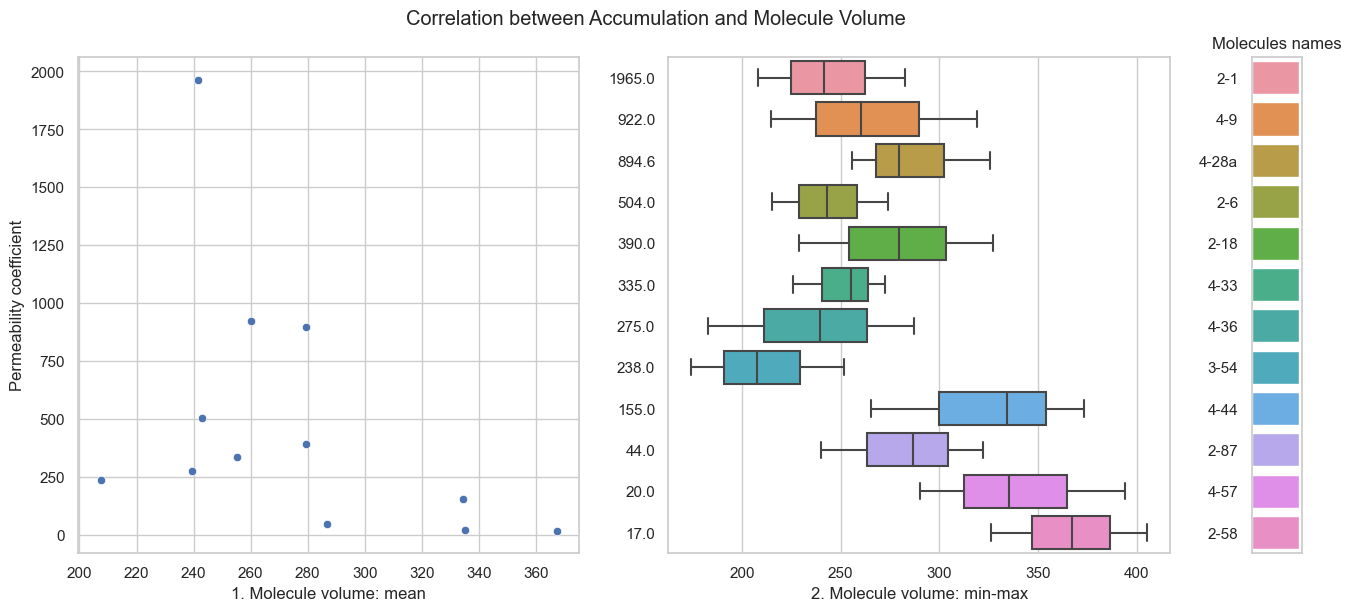

In [9]:
sns.color_palette("rocket", as_cmap=True)
sns.set_theme(style="whitegrid")
palette="pastel"

fig5 = plt.figure(constrained_layout=True, figsize=(13, 6))
fig5.suptitle("Correlation between Accumulation and Molecule Volume")
widths = [3, 3, 0.3]
#heights = [3, 3, 3]
spec5 = fig5.add_gridspec(ncols=3, nrows=1, width_ratios=widths)
spec5
for row in range(1):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        if col == 0:
            plot1 = sns.scatterplot(data=final_vol,
                                     x=' mean', y="Permeability coefficient")
            plot1.set(xlabel='1. Molecule volume: mean')
            
        if col == 1:
            plot2 = sns.boxplot(data=data, x= 'Volume' , y= 'Permeability coefficient')
            plot2.set(xlabel='2. Molecule volume: min-max', ylabel = " ")
            
        if col == 2:
            labels = final_vol['Name'].tolist()
            final_vol['test'] = 0.5
            plot3 = sns.barplot(data=final_vol, x= 'test' , y= 'Name')
            plot3.set(xlabel=' ', ylabel=' ', title = "Molecules names")
            plot3.xaxis.set_visible(False)
            


In [10]:
new_col_db = []
short_names_db = []
for name in df3_different_basis['refcode'].tolist():
    #print(name)
    x = name.split("_", 1)[0]
    short_names_db.append(x)
    acc_value = df_accum[df_accum['name'] == x]['Permeability coefficient'].tolist()[0]
    #print(acc_value)
    new_col_db.append(acc_value)
    
df3_different_basis['Permeability coefficient']  = new_col_db 
df3_different_basis['Name']  = short_names_db
df3_different_basis['DFT functional'] = 'B3LYP'
df3_different_basis

,refcode,mean,STD,min,max,median,Permeability coefficient,Name,DFT functional
0,2-1_9304_vol,242.8348,27.144492,191.186,282.499,245.4030,1965.0,2-1,B3LYP
1,4-28a_8960_vol,253.2956,19.440989,215.199,282.086,255.9130,894.6,4-28a,B3LYP
2,4-44_11278_vol,331.5555,28.524628,282.695,387.396,331.5555,155.0,4-44,B3LYP
3,4-33_9018_vol,249.3104,26.083695,194.571,290.559,256.8340,335.0,4-33,B3LYP
4,4-36_9022_vol,247.6111,33.330712,203.168,309.831,246.3415,275.0,4-36,B3LYP


In [11]:
to_comp = df3_different_basis['refcode'].tolist()

for item in to_comp:
    row = final_vol[final_vol['refcode'] == item]
    #df3_different_basis.loc[len(df3_different_basis)] = row
    df3_different_basis = pd.concat([df3_different_basis, row])
    
df3_different_basis      

,refcode,mean,STD,min,max,median,Permeability coefficient,Name,DFT functional,test
0,2-1_9304_vol,242.8348,27.144492,191.186,282.499,245.4030,1965.0,2-1,B3LYP,NaN
1,4-28a_8960_vol,253.2956,19.440989,215.199,282.086,255.9130,894.6,4-28a,B3LYP,NaN
2,4-44_11278_vol,331.5555,28.524628,282.695,387.396,331.5555,155.0,4-44,B3LYP,NaN
3,4-33_9018_vol,249.3104,26.083695,194.571,290.559,256.8340,335.0,4-33,B3LYP,NaN
4,4-36_9022_vol,247.6111,33.330712,203.168,309.831,246.3415,275.0,4-36,B3LYP,NaN
6,2-1_9304_vol,241.6934,23.463255,208.307,282.499,233.9890,1965.0,2-1,M06-2X,0.5
7,4-28a_8960_vol,279.4684,20.040541,255.913,325.707,277.7235,894.6,4-28a,M06-2X,0.5
8,4-44_11278_vol,334.3476,29.482340,265.244,373.436,340.2810,155.0,4-44,M06-2X,0.5
9,4-33_9018_vol,255.2772,14.218990,225.702,272.399,260.7250,335.0,4-33,M06-2X,0.5
10,4-36_9022_vol,239.4845,26.369223,182.851,286.975,242.5320,275.0,4-36,M06-2X,0.5


[Text(0.5, 0, 'Molecule name'),
 Text(0, 0.5, 'Volume'),
 Text(0.5, 1.0, 'The influence of the DFT functional')]

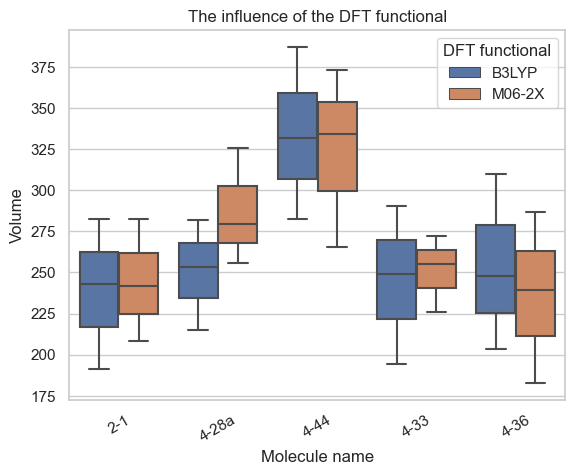

In [12]:
data_db=pd.melt(df3_different_basis, 
    id_vars= ['Name', 'DFT functional'], 
    value_vars=[' mean', ' min', ' max'], 
    var_name='metrics', 
    value_name='score', 
    col_level=None )
    
ax = sns.boxplot(data=data_db, x='Name', y='score', hue = 'DFT functional')

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set(xlabel='Molecule name', ylabel='Volume', title = "The influence of the DFT functional")


### pKa

In [41]:
pka_data = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/Computational-chemistry-course-project/pKa/results_test.csv', sep = ';')
pka_data

,refcode,delta G
0,2-2_charged_pka,-3866.620483
1,2-2_neutral_pka,-3866.154220
2,2-3_charged_pka,-829.902644
3,2-3_neutral_pka,-829.438089
4,NH3_charged_pka,-56.997691
5,NH3_neutral_pka,-56.536128


In [42]:
short_names_pka = []
charged_neutral = []
for name in pka_data['refcode'].tolist():
    #print(name)
    x = name.split("_", 1)[0]
    charged_neutrall = name.split("_", 1)[1]
    short_names_pka.append(x)
    charged_neutral.append(charged_neutrall)
pka_data['name'] =  short_names_pka
pka_data['Charge'] =  charged_neutral

pka_data['delta G'] = pka_data['delta G']*627.509

pka_data

,refcode,delta G,name,Charge
0,2-2_charged_pka,-2.426339e+06,2-2,charged_pka
1,2-2_neutral_pka,-2.426047e+06,2-2,neutral_pka
2,2-3_charged_pka,-5.207714e+05,2-3,charged_pka
3,2-3_neutral_pka,-5.204799e+05,2-3,neutral_pka
4,NH3_charged_pka,-3.576656e+04,NH3,charged_pka
5,NH3_neutral_pka,-3.547693e+04,NH3,neutral_pka


In [43]:
table = pd.pivot_table(pka_data, values ='delta G', index =['name'],
                         columns =['Charge'])

#format column names
table.columns = [''.join(str(s).strip() for s in col if s) for col in table.columns]

#reset index
table.reset_index(inplace=True)

table

,name,charged_pka,neutral_pka
0,2-2,-2.426339e+06,-2.426047e+06
1,2-3,-5.207714e+05,-5.204799e+05
2,NH3,-3.576656e+04,-3.547693e+04


In [44]:
T = 298.150 
R = 1.9872036e-03
H_const = -265.6
list_pkaa = []

for compound in table['name'].tolist():
    print(compound)
    delta_charged = table[table['name'] == compound]['charged_pka'].tolist()[0]
    delta_neutral = table[table['name'] == compound]['neutral_pka'].tolist()[0]
    pka = (delta_charged+H_const-delta_neutral) / (R*T*2.3)
    list_pkaa.append(pka)
table['pKa_easy_way'] = list_pkaa 
table  

2-2
2-3
NH3


,name,charged_pka,neutral_pka,pKa_easy_way
0,2-2,-2.426339e+06,-2.426047e+06,-409.611882
1,2-3,-5.207714e+05,-5.204799e+05,-408.825375
2,NH3,-3.576656e+04,-3.547693e+04,-407.447606


# Calculations

In [45]:
T = 298.150 
R = 1.9872036e-03
pkaNH3 = 9.24
deltaG_NH3 = table[table['name'] == 'NH3']['charged_pka'].tolist()[0] - table[table['name'] == 'NH3']['neutral_pka'].tolist()[0]

table = table.drop([table[table['name'] == 'NH3'].index.values.tolist()[0]])
deltaG_NH3
table

,name,charged_pka,neutral_pka,pKa_easy_way
0,2-2,-2.426339e+06,-2.426047e+06,-409.611882
1,2-3,-5.207714e+05,-5.204799e+05,-408.825375


In [46]:
pkbNH3 = 4.76
pka = []
for compound in table['name'].tolist():
    #print(compound)
    deltaG_sum = table[table['name'] == compound]['charged_pka'].tolist()[0] - table[table['name'] == compound]['neutral_pka'].tolist()[0] + deltaG_NH3
   #print(compound, table[table['name'] == compound]['charged_pka'].tolist()[0],table[table['name'] == compound]['neutral_pka'].tolist()[0])
   # print(table[table['name'] == compound]['charged_pka'].tolist()[0] - table[table['name'] == compound]['neutral_pka'].tolist()[0])
    pka_value = deltaG_sum/(R*T*np.log(10)) - pkbNH3
    pka.append(pka_value)
table['PKA'] = pka

In [48]:
table.rename({'charged_pka': 'ΔGA-', 'neutral_pka': 'ΔGHA' }, axis='columns')

,name,ΔGA-,ΔGHA,pKa_easy_way,PKA
0,2-2,-2.426339e+06,-2.426047e+06,-409.611882,-431.529751
1,2-3,-5.207714e+05,-5.204799e+05,-408.825375,-430.744127


# cclib

In [3]:
import cclib
import os, sys
from glob import glob

In [14]:
sys.path.append("/Users/sashaolshanova/GramNegative-Accumulation/Computational-chemistry-course-project/pKa/results_from_Dina")
refs = glob("*_pka.out")   
refs

['NH3_charged_pka.out',
 '2-3_neutral_pka.out',
 '2-20_neutral_pka.out',
 '2-2_neutral_pka.out',
 '2-46_charged_pka.out',
 '2-20_charged_pka.out',
 '2-2_charged_pka.out',
 '2-46_neutral_pka.out',
 'NH3_neutral_pka.out',
 '2-3_charged_pka.out']

In [15]:
df_pka_new = pd.DataFrame(columns=['refcode','delta G'])

for calc in refs:
  #print(calc)
  new_row = []
  data = cclib.io.ccread(calc)
  deltaG = min(data.scfenergies)*23.0621 
  new_row.append(calc.split(".")[0])
  new_row.append(deltaG ) 
  #print(new_row)
  df_pka_new.loc[len(df_pka_new)] = new_row
  
df_pka_new

,refcode,delta G
0,NH3_charged_pka,-3.576900e+04
1,2-3_neutral_pka,-5.205153e+05
2,2-20_neutral_pka,-2.450866e+06
3,2-2_neutral_pka,-2.426212e+06
4,2-46_charged_pka,-6.263589e+05
5,2-20_charged_pka,-2.451155e+06
6,2-2_charged_pka,-2.426504e+06
7,2-46_neutral_pka,-6.266482e+05
8,NH3_neutral_pka,-3.547934e+04
9,2-3_charged_pka,-5.208068e+05


In [16]:
short_names_pka = []
charged_neutral = []
for name in df_pka_new['refcode'].tolist():
    #print(name)
    x = name.split("_", 1)[0]
    charged_neutrall = name.split("_", 1)[1]
    short_names_pka.append(x)
    charged_neutral.append(charged_neutrall)
df_pka_new['name'] =  short_names_pka
df_pka_new['Charge'] =  charged_neutral

df_pka_new

,refcode,delta G,name,Charge
0,NH3_charged_pka,-3.576900e+04,NH3,charged_pka
1,2-3_neutral_pka,-5.205153e+05,2-3,neutral_pka
2,2-20_neutral_pka,-2.450866e+06,2-20,neutral_pka
3,2-2_neutral_pka,-2.426212e+06,2-2,neutral_pka
4,2-46_charged_pka,-6.263589e+05,2-46,charged_pka
5,2-20_charged_pka,-2.451155e+06,2-20,charged_pka
6,2-2_charged_pka,-2.426504e+06,2-2,charged_pka
7,2-46_neutral_pka,-6.266482e+05,2-46,neutral_pka
8,NH3_neutral_pka,-3.547934e+04,NH3,neutral_pka
9,2-3_charged_pka,-5.208068e+05,2-3,charged_pka


In [17]:
table = pd.pivot_table(df_pka_new, values ='delta G', index =['name'],
                         columns =['Charge'])

#format column names
table.columns = [''.join(str(s).strip() for s in col if s) for col in table.columns]

#reset index
table.reset_index(inplace=True)

table

,name,charged_pka,neutral_pka
0,2-2,-2.426504e+06,-2.426212e+06
1,2-20,-2.451155e+06,-2.450866e+06
2,2-3,-5.208068e+05,-5.205153e+05
3,2-46,-6.263589e+05,-6.266482e+05
4,NH3,-3.576900e+04,-3.547934e+04


In [18]:
T = 298.150 
R = 1.9872036e-03
H_const = -265.6
list_pkaa = []

for compound in table['name'].tolist():
    #print(compound)
    delta_charged = table[table['name'] == compound]['charged_pka'].tolist()[0]
    delta_neutral = table[table['name'] == compound]['neutral_pka'].tolist()[0]
    pka = (delta_charged+H_const-delta_neutral) / (R*T*2.3)
    list_pkaa.append(pka)
table['pKa_easy_way'] = list_pkaa 
table  

,name,charged_pka,neutral_pka,pKa_easy_way
0,2-2,-2.426504e+06,-2.426212e+06,-409.626542
1,2-20,-2.451155e+06,-2.450866e+06,-406.674503
2,2-3,-5.208068e+05,-5.205153e+05,-408.839644
3,2-46,-6.263589e+05,-6.266482e+05,17.349473
4,NH3,-3.576900e+04,-3.547934e+04,-407.462278


In [19]:
T = 298.150 
R = 1.9872036e-03
pkbNH3 = 4.76
deltaG_NH33 = table[table['name'] == 'NH3']['charged_pka'].tolist()[0] - table[table['name'] == 'NH3']['neutral_pka'].tolist()[0]

table = table.drop([table[table['name'] == 'NH3'].index.values.tolist()[0]])
deltaG_NH33
table

,name,charged_pka,neutral_pka,pKa_easy_way
0,2-2,-2.426504e+06,-2.426212e+06,-409.626542
1,2-20,-2.451155e+06,-2.450866e+06,-406.674503
2,2-3,-5.208068e+05,-5.205153e+05,-408.839644
3,2-46,-6.263589e+05,-6.266482e+05,17.349473


In [20]:
pka = []
for compound in table['name'].tolist():
    print(compound)
    deltaG_sum = table[table['name'] == compound]['charged_pka'].tolist()[0] - table[table['name'] == compound]['neutral_pka'].tolist()[0] + deltaG_NH33
    #print(compound, table[table['name'] == compound]['charged_pka'].tolist()[0],table[table['name'] == compound]['neutral_pka'].tolist()[0])
    #print(table[table['name'] == compound]['charged_pka'].tolist()[0] - table[table['name'] == compound]['neutral_pka'].tolist()[0])
    pka_value = deltaG_sum/(R*T*2.3) - pkbNH3
    pka.append(pka_value)
table['PKA'] = pka

2-2
2-20
2-3
2-46


In [21]:
table

,name,charged_pka,neutral_pka,pKa_easy_way,PKA
0,2-2,-2.426504e+06,-2.426212e+06,-409.626542,-432.038753
1,2-20,-2.451155e+06,-2.450866e+06,-406.674503,-429.086713
2,2-3,-5.208068e+05,-5.205153e+05,-408.839644,-431.251855
3,2-46,-6.263589e+05,-6.266482e+05,17.349473,-5.062738


In [22]:
table.rename({'charged_pka': 'ΔGA-', 'neutral_pka': 'ΔGHA' }, axis='columns')

,name,ΔGA-,ΔGHA,pKa_easy_way,PKA
0,2-2,-2.426504e+06,-2.426212e+06,-409.626542,-432.038753
1,2-20,-2.451155e+06,-2.450866e+06,-406.674503,-429.086713
2,2-3,-5.208068e+05,-5.205153e+05,-408.839644,-431.251855
3,2-46,-6.263589e+05,-6.266482e+05,17.349473,-5.062738
